In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS)

### Jarvis Algorithm

In [2]:
def findAngles(previous_vertex, vertex, points):
    """
    Find the angles between the vertex and the other points with respect to the previous vertex

    Parameters
    ----------
    previous_vertex : ndarray (1, 2)
        The previous vertex point
    vertex : ndarray (1, 2)
        The vertex point
    points : ndarray (n, 2)
        The other points
    
    Returns
    -------
    angles : ndarray (n, 1)
        The angles between the vertex and the other points
    """

    pivot_vector = previous_vertex - vertex
    vectors = points - vertex
    
    # Finding indices where previous_vertex and vertex lie in the points. Place inf in the angles array at these indices.
    condition = np.all(points == vertex, axis=1) + np.all(points == previous_vertex, axis=1)

    angles = np.where(condition, np.inf, np.arctan2(vectors[:, 1], vectors[:, 0]) - np.arctan2(pivot_vector[1], pivot_vector[0])).astype(np.float64) # Angles between the pivot vector and the other vectors.
    angles = np.where(angles < 0, angles + 2 * np.pi, angles).astype(np.float64)                                                                     # Add 2*pi to the negative angles.

    return angles

In [3]:
def convexHullAlgo(points):
    """
    Given a set a points in 2D, finds the boundary points of the convex hull

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    
    Returns
    -------
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    """

    boundary_points = []                               # Intializing the boundary points
    vertex = points[np.argmin(points[:,1])]            # Searching for the point with the minimum y-coordinate
    current_vertex = vertex.copy()                     # Initializing the current vertex
    previous_vertex = vertex.copy() + np.array([1, 0]) # Initializing the previous vertex as any point to the right of the current vertex (for the first iteration)

    
    while (np.allclose(current_vertex, vertex) == False or len(boundary_points) == 0):
        boundary_points.append(current_vertex)                       # Adding the current vertex to the boundary points
        angles = findAngles(previous_vertex, current_vertex, points) # Computing the angle b/w the vector (previous_vertex - current_vertex) and the other vectors (points - current_vertex)
        
        min_angle = np.min(angles) # Finding all the set of points with the minimum angle
        min_angle_indices = np.where(angles == min_angle)
        min_angle_points = points[min_angle_indices]

        distances = np.linalg.norm(min_angle_points - current_vertex, axis=1) # Computing the distances of the points with the minimum angle from the current vertex
        max_distance_index = np.argmax(distances)                             # Finding the point which is farthest from the current vertex
        
        previous_vertex = current_vertex                       # Initializing the previous vertex as the current vertex for the next iteration
        current_vertex = min_angle_points[max_distance_index]  # Updating the current vertex to the farthest point from the current vertex with the minimum angle

    boundary_points = np.array(boundary_points)
    return boundary_points

### Plot Visualisation

In [4]:
def plotConvexHull(points, boundary_points, cache=None):
    """
    Plots the convex hull of a set of points in 2D

    Parameters
    ----------
    points : ndarray of shape (n,2)
        The set of points in 2D
    boundary_points : ndarray of shape (m,2)
        The set of points that make up the convex hull
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting. 
    
    Returns
    -------
    None
    """

    plt.figure(figsize=(7, 7))
    plt.scatter(points[:, 0], points[:, 1], label='Points')
    plt.scatter(boundary_points[:, 0], boundary_points[:, 1], label='Boundary Points')

    # Finding angles of the boundary points with respect to the centroid, and sorting the boundary points in a clockwise manner
    centroid = np.mean(boundary_points, axis=0)
    angles = np.arctan2(boundary_points[:, 1] - centroid[1], boundary_points[:, 0] - centroid[0])
    boundary_points = boundary_points[np.argsort(angles)]
    
    # Add the first point to the end to close the polygon
    boundary_points = np.concatenate([boundary_points, boundary_points[:1]], axis=0)
    
    # Plotting the convex hull
    plt.plot(boundary_points[:, 0], boundary_points[:, 1], color='black')
    plt.fill(boundary_points[:, 0], boundary_points[:, 1], color=COLORS[2], alpha=0.5, label='Convex Hull')

    title = cache[0] if cache is not None else "Convex Hull"
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis('equal')
    plt.show()

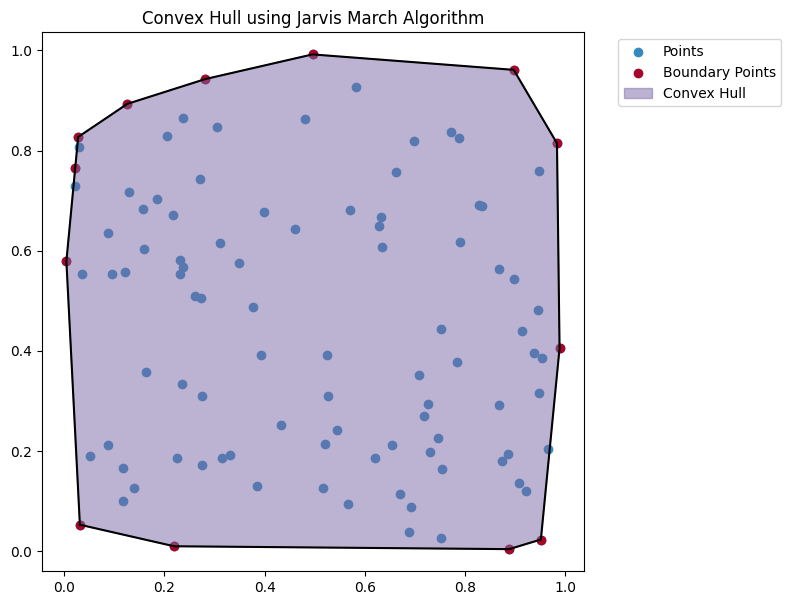

In [5]:
x = np.random.rand(100, 2)
boundary_points = convexHullAlgo(x)
plotConvexHull(x, boundary_points, cache=["Convex Hull using Jarvis March Algorithm"])